# 1. Business Understanding

## Overview 

The Ministry of Water under the Republic of Tanzania has tasked the Kuria's company to analyze data on water wells around the country in order to formalize a plan and budget in order to improve access to water supply and implement water resources development in preparation for the next financial year by creating new wells in the country.

## Problem Statement

The Kuria's company seeks to accomplish the following objectives from this project;

1. Identifying the factors influencing the functionality of wells.

2. Providing a strategy for building new wells to the ministry of water or donors.

3. Detecting patterns that lead to the unfunctionality of some wells.

4. Recommending a strategy on repairing non functional wells.


# 2. Data Understanding and Data Cleaning

In [111]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### X data set

In [112]:
# Loading the features dataset and showcasing the first five rows 
training_data = pd.read_csv('./data/training_set_values.csv')
training_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [113]:
# Displaying info about the data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [114]:
# Displaying the columns and identifying the ones necessary for tackling the problems
training_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

Dropping the ID column ensures no data leakage to avoid overfitting 

In [115]:
# Dropping unnecessary columns
X= training_data.drop(['id','wpt_name', 'recorded_by', 'date_recorded', 'scheme_name',
 'region_code', 'district_code', 'num_private',
 'extraction_type_group', 'management_group', 'quality_group',
 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']
, axis=1)

X.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,lga,...,construction_year,extraction_type,extraction_type_class,management,payment,payment_type,water_quality,quantity,source,waterpoint_type
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,Ludewa,...,1999,gravity,gravity,vwc,pay annually,annually,soft,enough,spring,communal standpipe
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,Serengeti,...,2010,gravity,gravity,wug,never pay,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,Simanjiro,...,2009,gravity,gravity,vwc,pay per bucket,per bucket,soft,enough,dam,communal standpipe multiple
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,...,1986,submersible,submersible,vwc,never pay,never pay,soft,dry,machine dbh,communal standpipe multiple
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,Karagwe,...,0,gravity,gravity,other,never pay,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 55763 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              55745 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   subvillage             59029 non-null  object 
 8   region                 59400 non-null  object 
 9   lga                    59400 non-null  object 
 10  ward                   59400 non-null  object 
 11  population             59400 non-null  int64  
 12  public_meeting         56066 non-null  object 
 13  scheme_management      55522 non-null  object 
 14  permit                 56344 non-null  object 
 15  co

In [117]:
# Checking for duplicates
X.duplicated().sum()   

200

The duplicates are retained in order to maintain uniformity in shape of the features set and the target set, that being the 59,400 rows

In [118]:
# Checking for missing values
X.isna().sum()

amount_tsh                  0
funder                   3637
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
subvillage                371
region                      0
lga                         0
ward                        0
population                  0
public_meeting           3334
scheme_management        3878
permit                   3056
construction_year           0
extraction_type             0
extraction_type_class       0
management                  0
payment                     0
payment_type                0
water_quality               0
quantity                    0
source                      0
waterpoint_type             0
dtype: int64

In [119]:
# Replacing the missing values with 'None'
X= X.fillna('None')

The missing values are filled with 'None' in order to keep the number of rows of the X_training values and the y_training values the same in order to train the model accordingly.

In [120]:
# Confirmation that there are no missing values
X.isna().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management               0
payment                  0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
dtype: int64

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   subvillage             59400 non-null  object 
 8   region                 59400 non-null  object 
 9   lga                    59400 non-null  object 
 10  ward                   59400 non-null  object 
 11  population             59400 non-null  int64  
 12  public_meeting         59400 non-null  object 
 13  scheme_management      59400 non-null  object 
 14  permit                 59400 non-null  object 
 15  co

In [122]:
# Confirmation of the number of rows in the data set
X.shape

(59400, 25)

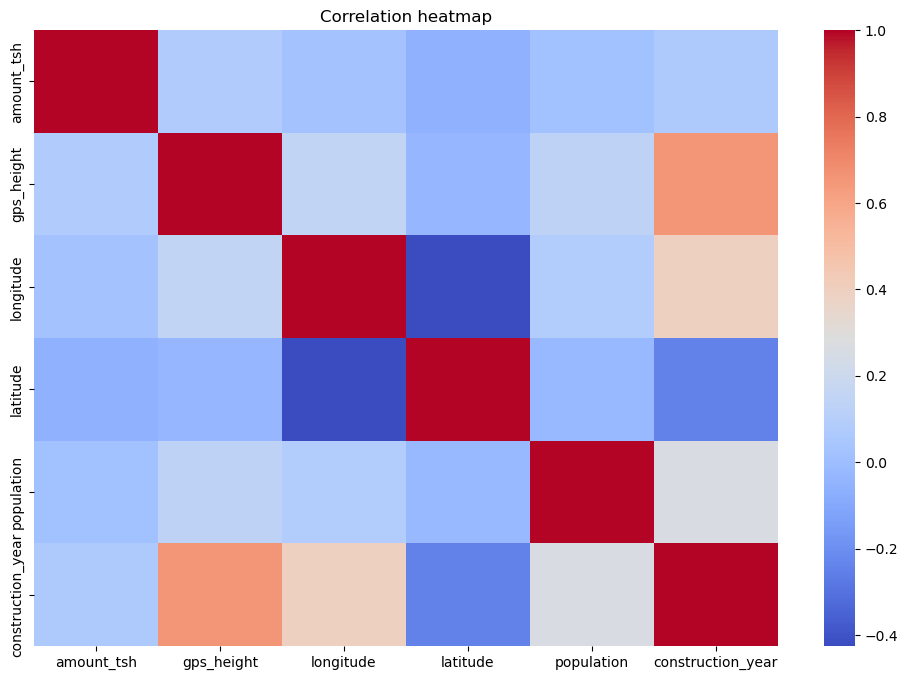

In [123]:
# Correlation heatmap to identify highly correlated features
corr_matrix = X.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

# Dropping highly correlated features if existent in the features set (threshold > 0.85)
high_corr = set()
threshold = 0.85
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

X = X.drop(columns=list(high_corr))



### y data set

In [124]:
# Loading the target variable dataset and showcasing the first five rows
y= pd.read_csv('./data/training_set_labels.csv')
y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [125]:
# Displaying the different classes in the target variable
y['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [126]:
# Changing the 'functional needs repair' label for easy identification
label_mapping = {'functional needs repair': 'needs repair'}
y['status_group'] = y['status_group'].replace(label_mapping)
y['status_group'].value_counts()

status_group
functional        32259
non functional    22824
needs repair       4317
Name: count, dtype: int64

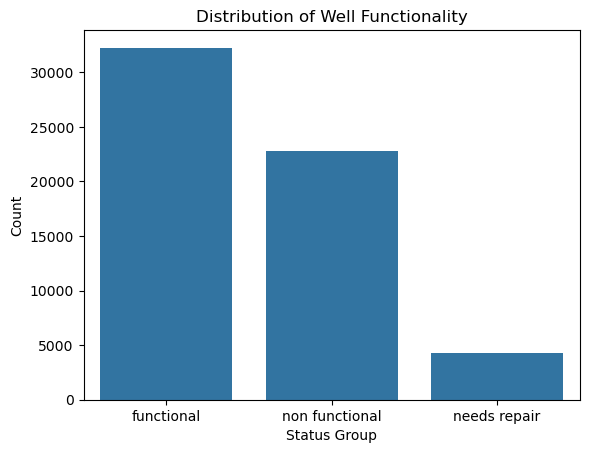

In [150]:
sns.countplot(x=y)
plt.title("Distribution of Well Functionality")
plt.xlabel("Status Group")
plt.ylabel("Count")
plt.show()


In [127]:
# Displaying the info on the target variable dataset
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [128]:
# Checking for duplicates
y.duplicated().sum()

0

In [129]:
# Checking for missing values
y.isna().sum()

id              0
status_group    0
dtype: int64

In [130]:
# Confirmation on the same number of rows in both feature and target variable datasets
y.shape

(59400, 2)

In [131]:
# Dropping the 'id' column from the target variable dataset
y= y['status_group']

### X test data set

In [132]:
# Loading the test set features dataset and showcasing the first five rows
x_test=pd.read_csv('./data/test_set_values.csv')
x_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [133]:
# Checking for missing values in the test set
x_test.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [134]:
# Replacing the missing values with 'None'
x_test.fillna('None', inplace=True)

In [135]:
# Confirmation of no missing values 
x_test.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [136]:
# Confirmation of the number of rows in the test set
x_test.shape


(14850, 40)

The test set seems to have been pre split from the training set, thus the fewer number of rows. The number of columns differ since the unecessary ones haven't been dropped.

In [137]:
# Displaying the columns in the test set
x_test.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [138]:
# Dropping the same columns dropped in the training set 
x_test= x_test.drop(['id','wpt_name', 'recorded_by', 'date_recorded', 'scheme_name',
 'region_code', 'district_code', 'num_private',
 'extraction_type_group', 'management_group', 'quality_group',
 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']
, axis=1)

In [139]:
# Importing scikit-learn libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance


In [140]:
# Converting all non-numeric columns to string
cat_cols = X.select_dtypes(exclude=[np.number]).columns
X[cat_cols] = X[cat_cols].astype(str)


The data was provided with a training set and a testing set but the testing set doesn't include the target column thus a train-test-split is necessary in order to evaluate the perfomance of the models in the testing section.(the actual y values are needed to evaluate the perfomance of the model)

In [141]:
# 5. Train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train size:", X_train.shape, "Testing size:", X_test.shape)


Train size: (47520, 25) Testing size: (11880, 25)


## Data Preparation
Pipelines prevent leakage and ensure consistent preprocessing.


In [142]:
# 4. Preprocessing Pipelines to prevent data leakage
numeric_features = X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object","category"]).columns.tolist()

# Dropping ID columns if present
for col in ["id", "row_id"]:
    if col in numeric_features: numeric_features.remove(col)
    if col in categorical_features: categorical_features.remove(col)

# Standardizing numerical features
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# One-hot encoding categorical features
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combining both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


## Baseline Model: Logistic Regression
Addresses Problem 1 (factors influencing functionality).


In [143]:
# Baseline Logistic Regression
baseline_clf = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, multi_class="multinomial",
                               solver="lbfgs", class_weight="balanced", random_state=42))
])

baseline_clf.fit(X_train, y_train)
y_val_pred = baseline_clf.predict(X_test)

print(classification_report(y_test, y_val_pred, digits=3))
print(confusion_matrix(y_test, y_val_pred))


                precision    recall  f1-score   support

    functional      0.825     0.761     0.792      6457
  needs repair      0.307     0.611     0.408       851
non functional      0.809     0.748     0.777      4572

      accuracy                          0.745     11880
     macro avg      0.647     0.707     0.659     11880
  weighted avg      0.782     0.745     0.759     11880

[[4915  838  704]
 [ 230  520  101]
 [ 816  338 3418]]


## Tuned Logistic Regression
Addresses Problem 2 (strategy for building new wells).


In [144]:
from sklearn.model_selection import GridSearchCV

# Increase max_iter and switch solver to saga
baseline_clf = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(
        max_iter=5000, multi_class="multinomial",
        solver="saga", class_weight="balanced", random_state=42))
])

param_grid = {"clf__C": [0.01, 0.1, 1, 10]}
grid = GridSearchCV(baseline_clf, param_grid, cv=5, scoring="f1_macro")
grid.fit(X_train, y_train)

best_logit = grid.best_estimator_
y_val_pred = best_logit.predict(X_test)

print("Best params:", grid.best_params_)
print(classification_report(y_test, y_val_pred, digits=3))


Best params: {'clf__C': 10}
                precision    recall  f1-score   support

    functional      0.826     0.761     0.792      6457
  needs repair      0.306     0.599     0.405       851
non functional      0.806     0.753     0.779      4572

      accuracy                          0.746     11880
     macro avg      0.646     0.704     0.659     11880
  weighted avg      0.781     0.746     0.759     11880



There isn't much of a difference in the average F1 scores, thus a better model is required.

## Nonparametric Model: Decision Tree
Addresses Problem 3 (patterns making wells non-functional).


In [145]:
# Cleaning types before fitting
cat_cols = X.select_dtypes(exclude=[np.number]).columns
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

# Decision Tree Classifier with Grid Search
tree_pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
])

tree_params = {
    "clf__max_depth": [5, 10, None],
    "clf__min_samples_split": [2, 10, 50],
    "clf__min_samples_leaf": [1, 5, 20]
}

tree_grid = GridSearchCV(tree_pipe, tree_params, cv=5, scoring="f1_macro")
tree_grid.fit(X_train, y_train)

best_tree = tree_grid.best_estimator_
y_val_pred_tree = best_tree.predict(X_test)

print("Best tree params:", tree_grid.best_params_)
print(classification_report(y_test, y_val_pred_tree, digits=3))


Best tree params: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
                precision    recall  f1-score   support

    functional      0.814     0.797     0.805      6457
  needs repair      0.363     0.442     0.399       851
non functional      0.783     0.775     0.779      4572

      accuracy                          0.763     11880
     macro avg      0.653     0.671     0.661     11880
  weighted avg      0.770     0.763     0.766     11880



The average F1 score slighly increases functionality due to the categorical splits.

## Ensemble Model: Random Forest
Addresses Problem 4 (repair strategy).


In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_pipe = Pipeline(steps=[
    ("prep", preprocessor),  # uses updated cat_cols and num_cols
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])

rf_pipe.fit(X_train, y_train)
y_val_pred_rf = rf_pipe.predict(X_test)

print(classification_report(y_test, y_val_pred_rf, digits=3))


                precision    recall  f1-score   support

    functional      0.811     0.881     0.844      6457
  needs repair      0.527     0.344     0.416       851
non functional      0.833     0.785     0.808      4572

      accuracy                          0.806     11880
     macro avg      0.724     0.670     0.690     11880
  weighted avg      0.799     0.806     0.800     11880



## Evaluation Visuals
Confusion matrix heatmap for clarity.


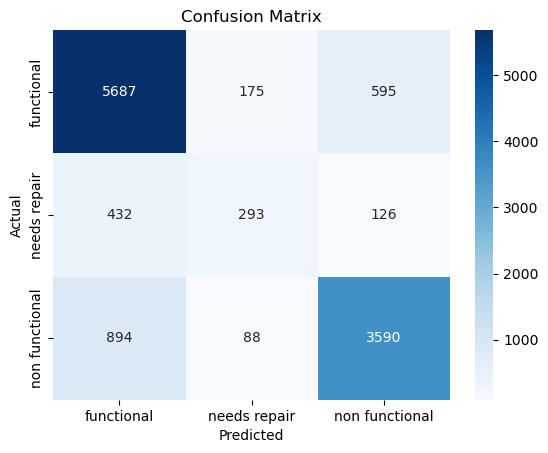

In [147]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_val_pred_rf, labels=rf_pipe.named_steps["clf"].classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_pipe.named_steps["clf"].classes_,
            yticklabels=rf_pipe.named_steps["clf"].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Feature Importance
Permutation importance to interpret model drivers.


In [151]:
r = permutation_importance(rf_pipe, X_test, y_test, n_repeats=5, random_state=42)
feature_names = rf_pipe.named_steps["prep"].get_feature_names_out()
imp_df = pd.DataFrame({"feature": feature_names, "importance": r.importances_mean})
imp_df = imp_df.sort_values("importance", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=imp_df, x="importance", y="feature", color="steelblue")
plt.title("Top 15 Features Influencing Well Functionality")
plt.xlabel("Importance (Mean Decrease in Accuracy)")
plt.ylabel("Feature")
plt.show()


ValueError: All arrays must be of the same length

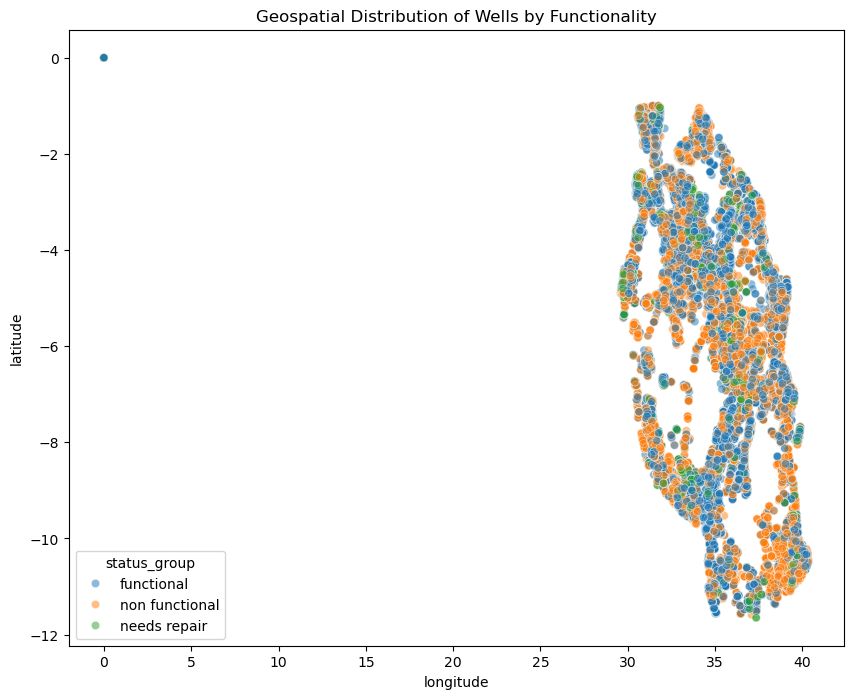

In [158]:
# Combine X and y into one DataFrame
df_plot = X.copy()
df_plot["status_group"] = y

# Now plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_plot, x="longitude", y="latitude", hue="status_group", alpha=0.5)
plt.title("Geospatial Distribution of Wells by Functionality")
plt.show()


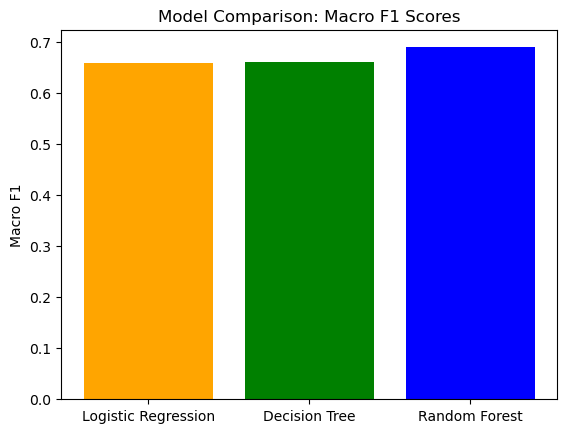

In [159]:
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
scores = [0.659, 0.661,0.690 ]  # replace with actual macro F1 values

plt.bar(models, scores, color=["orange","green","blue"])
plt.title("Model Comparison: Macro F1 Scores")
plt.ylabel("Macro F1")
plt.show()


## Final Model & Predictions
Train on full dataset and generate predictions for test set.


In [149]:
# Final Model & Predictions
final_model = rf_pipe  # or best_logit/best_tree depending on evaluation
final_model.fit(X_train, y_train)

test_pred = final_model.predict(X_test)
pd.DataFrame({"prediction": test_pred}).to_csv("test_predictions.csv", index=False)


# Recommendations

# Conclusion